# Classification

Les tâches d'apprentissage supervisée les plus communes sont la **la classification** et **la régression**. Nous avons choisi de rester dans le cadre de la classification avec les deux TD précédents(KNN et random forest) parce qu'elle est plus simple à expliquer et conceptualiser que la regression qui fait intervenir pas mal de notion mathématique. 

Vous pouvez suivre les références qui suivent pour allez voir des exemples d'application de regression.

[Qu'est ce que la regression et la classification en machine learning](https://www.youtube.com/watch?v=kIpaAs3Onfg)

[La régression linéaire 1 ](https://www.youtube.com/watch?v=wg7-roETbbM&list=PLO_fdPEVlfKqUF5BPKjGSh7aV9aBshrpY&index=3)


Ce TD est le 3e sur la classification et il va beaucoup plus en détail là où les autres vous montrait plus des méthodes applicables. Ici on aller pas à pas vers la résolution d'un problème à l'aide des sytèmes de classification.

**Comprendre ce TD est essentiel pour effectuer les exercices que vous aurez à faire par la suite.**

## MNIST

Nous allons nous servir du dataset MNIST. C'est une collection de 70000 images de numéro écrit à la main par des étudiants et des employés américains. Chaque image est accompagné d'un label qui indique le numéro qu'elle réprésente. Ce dataset est considéré comme le "hello world" du machine learning ce qui en fait un dataset complet et intéressant pour toute les taches qu'on va effectuer durant ce TD.

Scikit-learn fournit beaucoup de fonctions qui permettent de charger des datasets populaires. MNIST fait parti des datasets qu'il est possible de charger.

Le code qui suit permet de charger le dataset MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Les datasets chargé avec Scikit-learn ont généralement une structure similaire incluant : 
- DESCR : une description du dataset.
- data : contenant un tableau avec une ligne par instance et une colonne par caractéristique.
- target : contenant un tableau avec les labels.

Regardons les tableaux data et target.

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

On relève que il y a 70000 images, et chaque image à 784 caractéristiques. 784 = 28x28 donc le 784 vient du fait que chaque image fait 28x28 pixels et chaque caractéristiques représente simplement l'intensité d'un pixel, l'intensité variant de 0(blanc) à 255(noir).

Jettons un coup d'oeil à un des nombres de notre dataset. Il vous suffit de saisir le vecteur de caractéristiques d'une instance, de le remodeler en un tableau 28×28 et de l'afficher à l'aide de la fonction imshow() de Matplotlib. En pratique on le fait comme suit :

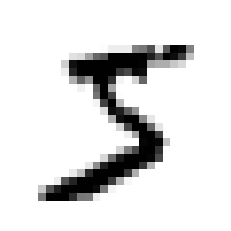

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.to_numpy()[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

On dirait le chiffre 5. Et en regardant le label comme ci dessus on confirme effectivement que c'est le chiffre 5

In [5]:
y[0]

'5'

Vous remarquerez que le label est etouré d'entrecôte indiquant que c'est un type **chaine de carctère**. Il serait préférable d'avoir un nombre donc nous allons convertir cette chaîne de caractère en nombre.

In [6]:
import numpy as np

y = y.astype(np.uint8)

La figure qui suit montre d'autres images présente dans le dataset MNIST afin de vous donnez une idée de la complexité de la tâche de classification.
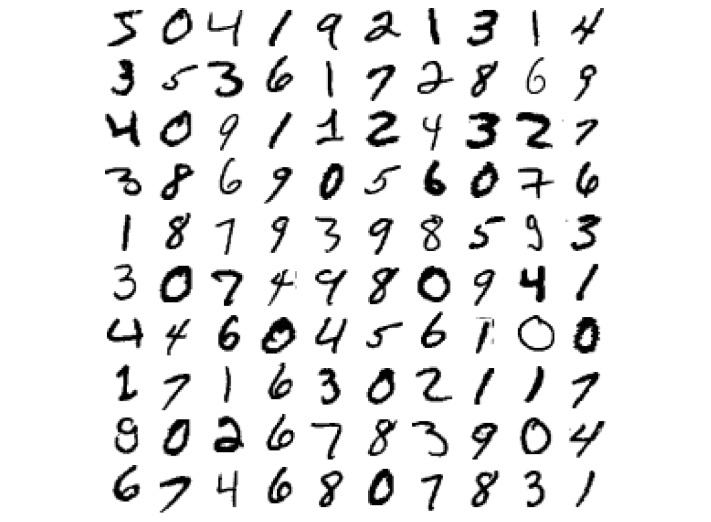

Vous devez toujours créer un ensemble de test et le mettre de côté avant d'inspecter les données de près. L'ensemble de données MNIST est en fait déjà divisé en un ensemble de formation (les 60 000 premières images) et un ensemble de test (les 10 000 dernières images) :

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Formation d'un classificateur binaire (binary classifier)

Simplifions le problème pour l'instant et essayons d'identifier un seul chiffre - par exemple, le chiffre 5. Ce "détecteur de 5" sera un exemple de classificateur binaire, capable de distinguer deux classes seulement, 5 et non 5. Créons les vecteurs cibles pour cette tâche de classification :

In [8]:
y_train_5 = (y_train == 5) # vrai pour tout les 5, Faux pour tout les autres chiffres
y_test_5 = (y_test == 5)

Bon, maintenant, choisissons un classificateur et entraînons-le. Un bon point de départ est le classificateur SGD (Stochastic Gradient Descent), avec la classe SGDClassifier de Scikit-Learn. Ce classificateur a l'avantage de pouvoir traiter efficacement de très grands ensembles de données.

Créons un SGDClassifier et entraînons-le sur l'ensemble de la formation :

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

Maintenant on peut utiliser notre classificateur pour detecter le chiffre 5:

In [10]:
sgd_clf.predict([some_digit]) #some_digit c'est le chiffre qu'on a récupéré plus haut

array([ True])

Le classificateur devine que cette image représente un 5 (True). On dirait qu'il a deviné juste dans ce cas particulier ! Maintenant, évaluons les performances de ce modèle.

## Mesure de performance

L'évaluation d'un classificateur est souvent délicate c'est pourquoi nous consacrerons une grande partie de ce TD à ce sujet. Il existe de nombreuses mesures de performances.

### Mesure de la précision à l'aide de la validation croisée(Cross-Validation)

Utilisons la fonction cross_val_score() de scikit-learn pour évaluer votre modèle SGDClassifier en utilisant la validation croisée K-fold, avec trois plis. La validation croisée K-fold signifie diviser l'ensemble d'apprentissage en K-folds (dans ce cas, trois), puis faire des prédictions et les évaluer sur chaque fold en utilisant un modèle formé sur les folds restants.

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Une précision supérieure à 95 % (taux de prédictions correctes en moyenne) sur tous les plis de validation croisée ? Cela semble incroyable, n'est-ce pas ? Eh bien, avant de vous emballer, regardons un classificateur très bête qui classe toutes les images dans la classe "pas-5" :

In [12]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Pouvez-vous deviner la précision de ce modèle ? C'est ce que nous allons découvrir :

In [13]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

C'est exact, il a une précision de plus de 90 % ! Cela s'explique simplement par le fait que seulement 10 % environ des images sont des 5, donc si vous devinez toujours qu'une image n'est pas un 5, vous aurez raison environ 90 % du temps. 

Cela montre pourquoi la précision n'est généralement pas la mesure de performance préférée pour les classificateurs, en particulier lorsque vous avez affaire à des ensembles de données asymétriques (c'est-à-dire lorsque certaines classes sont beaucoup plus fréquentes que d'autres).

### Matrice de confusion(Confusion Matrix)

Une bien meilleure façon d'évaluer la performance d'un classificateur est de regarder la matrice de confusion. L'idée générale est de compter le nombre de fois où des instances de la classe A sont classées dans la classe B. Par exemple, pour connaître le nombre de fois où le classificateur a confondu des images de 5 avec des images de 3, il faut regarder la 5e ligne et la 3e colonne de la matrice de confusion.

Pour calculer la matrice de confusion, vous devez d'abord disposer d'un ensemble de prédictions, afin de pouvoir les comparer aux cibles réelles. Vous pourriez faire des prédictions sur l'ensemble de test, mais laissons-le intact pour l'instant (rappelez-vous que vous voulez utiliser l'ensemble de test seulement à la toute fin de votre projet, une fois que vous avez un classificateur que vous êtes prêt à lancer). Au lieu de cela, vous pouvez utiliser la fonction **cross_val_predict()** :

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Tout comme la fonction cross_val_score(), cross_val_predict() effectue une validation croisée K-fold, mais au lieu de renvoyer les scores d'évaluation, elle renvoie les prédictions faites sur chaque pli de test. Cela signifie que vous obtenez une prédiction propre pour chaque instance de l'ensemble de formation ("clean prediction").
instance de l'ensemble d'apprentissage ("propre" signifie que la prédiction est faite par un modèle qui n'a jamais vu les données pendant l'apprentissage).

Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes **(y_train_5)** and the predicted classes **(y_train_pred)**:

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Chaque ligne d'une matrice de confusion représente une classe réelle, tandis que chaque colonne représente une classe prédite. La première ligne de cette matrice considère les images de non-5 (la classe négative) : 53 057 d'entre elles ont été correctement classées comme non-5 (elles sont appelées vrais négatifs), tandis que les 1 522 restantes ont été classées à tort comme 5 (faux positifs). La deuxième ligne considère les images de 5s (la classe positive) : 1 325 ont été classées à tort comme des non-5 (faux négatifs), tandis que les 4 096 restantes ont été correctement classées comme des 5 (vrais positifs). Un classificateur parfait n'aurait que des vrais positifs et des vrais négatifs, de sorte que sa matrice de confusion n'aurait des valeurs non nulles que sur sa diagonale principale (du haut à gauche au bas à droite) :

In [16]:
y_train_perfect_predictions = y_train_5 # on pretend qu'on a atteint la perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

La matrice de confusion vous donne beaucoup d'informations, mais parfois vous pouvez préférer une métrique plus concise. Une mesure intéressante à examiner est l'exactitude des prédictions positives ; c'est ce qu'on appelle la précision du classificateur.



TP est le nombre de vrais positifs, et FP est le nombre de faux positifs.

Une façon triviale d'avoir une précision parfaite est de faire une seule prédiction positive et de s'assurer qu'elle est correcte (précision = 1/1 = 100%). Cela ne serait pas très utile puisque le classificateur ignorerait toutes les instances positives sauf une. La précision est donc généralement utilisée avec une autre mesure appelée rappel(recall), également appelée sensibilité ou taux de vrais positifs.

(TPR) : il s'agit du ratio d'instances positives correctement détectées par le classifieur.



FN est bien sûr le nombre de faux négatifs.

Si vous ne comprenez pas bien la matrice de confusion, la figure qui suit peut vous aider(prennez quelques minutes pour la comprendre).

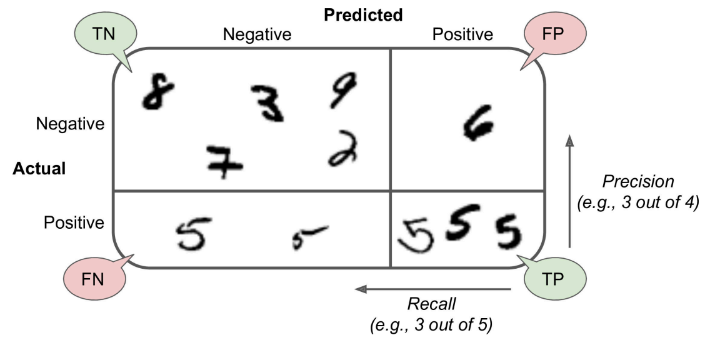

#### Precision et rappel(recall)

Scikit-Learn fournit plusieurs fonctions pour calculer les métriques du classificateur, notamment la précision et le rappel :

In [17]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [18]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

Maintenant, votre détecteur de 5 n'a pas l'air aussi brillant que lorsque vous avez examiné sa précision. Lorsqu'il affirme qu'une image représente un 5, il n'a raison que dans 83,7 % des cas. De plus, il ne détecte que 65,1 % des 5.

Il est souvent pratique de combiner la précision et le rappel en une seule métrique appelée le ***score F1***, en particulier si vous avez besoin d'un moyen simple de comparer deux classificateurs. Le score F1 est la moyenne harmonique de la précision et du rappel. Alors que la moyenne normale traite toutes les valeurs de manière égale, la moyenne harmonique donne beaucoup plus de poids aux valeurs faibles. Par conséquent, le classificateur n'obtiendra un score F1 élevé que si le rappel et la précision sont élevés.



Pour calculer le score F1 il suffit d'appeler la fonction f1_score() :

In [19]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

Le score F1 favorise les classifieurs qui ont une précision et un rappel similaires. Ce n'est pas toujours ce que l'on souhaite : dans certains contextes, la précision est primordiale, tandis que dans d'autres, c'est le rappel qui compte. Par exemple, si vous formez un classificateur pour détecter les vidéos sans danger pour les enfants, vous préférerez probablement un classificateur qui rejette beaucoup de bonnes vidéos (faible rappel) mais ne conserve que les vidéos sans danger (précision élevée), plutôt qu'un classificateur qui a un rappel beaucoup plus élevé mais laisse quelques vidéos vraiment mauvaises apparaître dans votre produit (dans de tels cas, vous pouvez même vouloir ajouter un pipeline humain pour vérifier la sélection de vidéos du classificateur). D'autre part, supposons que vous formiez un classificateur pour détecter des voleurs à l'étalage sur des images de surveillance : il n'y a probablement pas de problème si votre classificateur n'a qu'une précision de 30 %, tant qu'il a un taux de rappel de 99 % (bien sûr, les agents de sécurité recevront quelques fausses alertes, mais presque tous les voleurs à l'étalage seront arrêtés).

Malheureusement, on ne peut pas avoir le beurre et l'argent du beurre : l'augmentation de la précision réduit le rappel, et vice versa. C'est ce qu'on appelle le compromis précision/rappel.

#### Compromis précision/rappel

Pour comprendre ce compromis, examinons comment le SGDClassifier prend ses décisions de classification. Pour chaque instance, il calcule un score basé sur une fonction de décision, et si ce score est supérieur à un seuil, il affecte l'instance à la classe positive, ou sinon il l'affecte à la classe négative. La figure en bas montre quelques chiffres positionnés du score le plus bas à gauche au score le plus élevé à droite. 

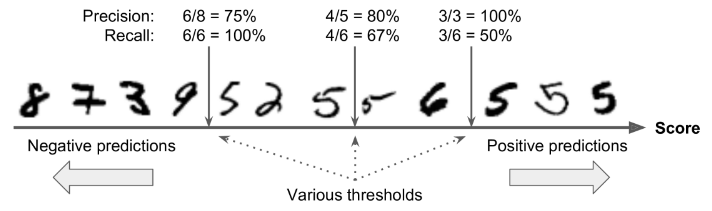

Supposons que le seuil de décision soit positionné au niveau de la flèche centrale (entre les deux 5) : vous trouverez 4 vrais positifs (des 5 réels) à droite de ce seuil, et un faux positif (un 6 réel). Donc, avec ce seuil, la précision est de 80% (4 sur 5). Mais sur les 6 5 réels, le classificateur n'en détecte que 4, donc le rappel est de 67% (4 sur 6). Maintenant, si vous augmentez le seuil (déplacez-le vers la flèche à droite), le faux positif (le 6) devient un vrai négatif, ce qui augmente la précision (jusqu'à 100 % dans ce cas), mais un vrai positif devient un faux négatif, ce qui réduit le rappel à 50 %. Inversement, l'abaissement du seuil augmente le rappel et réduit la précision.

Scikit-Learn ne vous permet pas de définir directement le seuil, mais il vous donne accès aux scores de décision qu'il utilise pour faire des prédictions. Au lieu d'appeler la méthode predict() du classificateur, vous pouvez appeler sa méthode decision_function(), qui renvoie un score pour chaque instance, puis faire des prédictions basées sur ces scores en utilisant le seuil de votre choix :

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [21]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Le SGDClassifier utilise un seuil égal à 0, donc le code précédent renvoie le même résultat que la méthode predict() (c'est-à-dire True). Augmentons le seuil :

In [22]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Cela confirme que l'augmentation du seuil diminue le rappel. L'image représente en fait un 5, et le classificateur le détecte lorsque le seuil est de 0, mais il le rate lorsque le seuil est augmenté à 8000.

Maintenant, comment décider du seuil à utiliser ? Pour cela, vous devez d'abord obtenir les scores de toutes les instances de l'ensemble d'apprentissage en utilisant à nouveau la fonction cross_val_predict(), mais cette fois en spécifiant que vous voulez qu'elle renvoie les scores de décision au lieu des prédictions :

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

Avec ces scores, vous pouvez maintenant calculer la précision et le rappel pour tous les seuils possibles en utilisant la fonction precision_recall_curve() :

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Enfin, vous pouvez tracer la précision et le rappel en fonction de la valeur seuil à l'aide de Matplotlib.

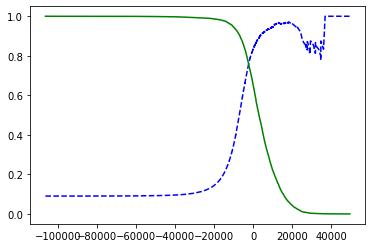

In [25]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] # mettre en évidence le seuil, ajouter la légende, l'étiquette de l'axe et la grille

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

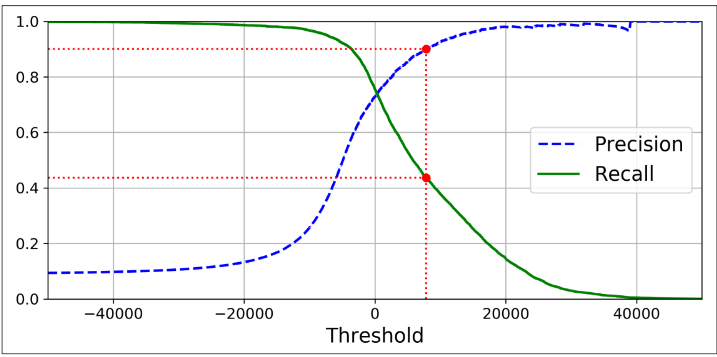

Vous vous demandez peut-être pourquoi la courbe de précision est plus irrégulière que la courbe de rappel dans la figure 3-4. La raison est que la précision peut parfois diminuer lorsque vous augmentez le seuil.

Une autre façon de sélectionner un bon compromis précision/rappel consiste à tracer directement la précision en fonction du rappel, comme le montre la figure qui suit (le même seuil que précédemment est surligné).

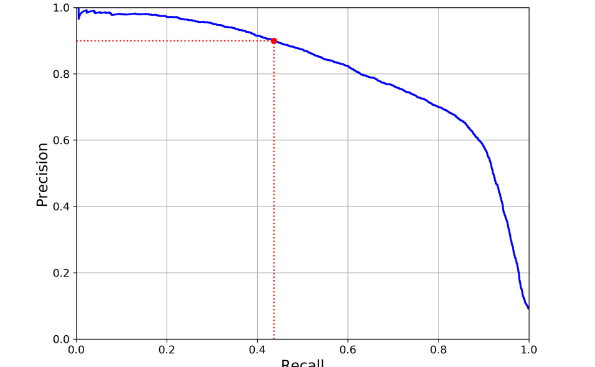

Vous pouvez voir que la précision commence vraiment à chuter brusquement autour de 80 % de rappel. Vous voudrez probablement choisir un compromis précision/rappel juste avant cette chute, par exemple, à environ 60 % de rappel. Mais bien sûr, le choix dépend de votre projet.

Supposons donc que vous décidiez de viser une précision de 90 %. Vous consultez le premier graphique et vous constatez que vous devez utiliser un seuil d'environ 8 000. Pour être plus précis, vous pouvez rechercher le seuil le plus bas qui vous donne une précision d'au moins 90 % (np.argmax() nous donnera le premier indice de la valeur maximale, ce qui dans ce cas signifie la première valeur vraie) :

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

3370.019499143957

Pour faire des prédictions (sur l'ensemble d'apprentissage pour le moment), au lieu d'appeler la méthode predict() du classificateur, vous pouvez simplement exécuter ce code :

In [27]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

Vérifions la précision et le rappel de ces prédictions :

In [28]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

Super, vous avez un classificateur d'une précision de 90% ! Comme vous pouvez le constater, il est assez facile de créer un classificateur avec pratiquement n'importe quelle précision : il suffit de fixer un seuil suffisamment élevé, et le tour est joué. 

**Cependant, Un classificateur de haute précision n'est pas très utile si son rappel est trop faible !
Si quelqu'un dit "atteignons 99% de précision", vous devriez demander "à quel rappel ?".**

### La courbe ROC 

La courbe *receiver operating characteristic* (ROC) est un autre outil commun utilisé avec classificateurs binaires.

Elle est très similaire à la courbe précision/rappel, mais au lieu de tracer la précision en fonction du rappel,La courbe ROC représente le taux de vrais positifs (un autre nom pour le rappel) par rapport au taux de faux positifs. Le taux de faux positifs est le rapport entre les instances négatives qui sont incorrectement classées comme positives. Il est égal à un moins le taux de vrais négatif. Le TNR est également appelé spécificité. La courbe ROC représente donc la sensibilité (rappel) en fonction de 1 - spécificité.

Pour tracer la courbe ROC, vous devez d'abord calculer le TPR et le FPR pour différentes valeurs de seuil, en utilisant la fonction roc_curve() :

In [30]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Ensuite, vous pouvez tracer le FPR contre le TPR en utilisant Matplotlib.

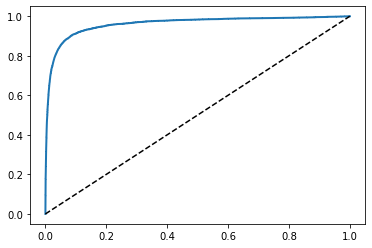

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # diagonale en pointillés
    [...] # Ajouter des étiquettes d'axe et une grille
    
plot_roc_curve(fpr, tpr)
plt.show()

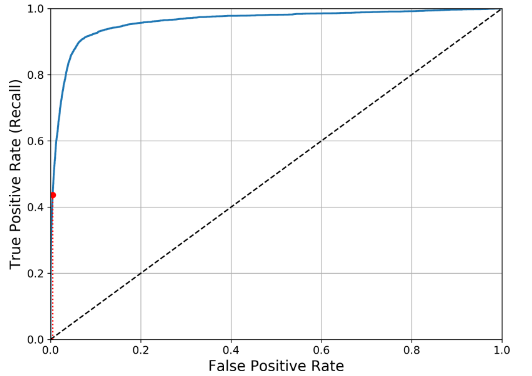

Une fois encore, il y a un compromis : plus le rappel (TPR) est élevé, plus le classificateur produit de faux positifs (FPR). La ligne en pointillés représente la courbe ROC d'un classificateur purement aléatoire ; un bon classificateur se tient aussi loin que possible de cette ligne (vers le coin supérieur gauche).

Une façon de comparer les classificateurs est de mesurer l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC égale à 0,5. Scikit-Learn fournit une fonction permettant de calculer l'AUC ROC :

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

La courbe ROC étant très similaire à la courbe précision/rappel (ou PR), vous pouvez vous demander comment décider laquelle utiliser. En règle générale, vous devriez préférer la courbe PR lorsque la classe positive est rare ou lorsque vous vous souciez davantage des faux positifs que des faux négatifs, et la courbe ROC dans le cas contraire. Par exemple, en regardant la courbe ROC précédente (et le score ROC AUC), vous pouvez penser que le classifieur est vraiment bon. Mais c'est surtout parce qu'il y a peu de positifs (5s) par rapport aux négatifs (non-5s). En revanche, la courbe PR montre clairement que le classificateur peut être amélioré (la courbe pourrait être plus proche du coin supérieur droit).

Nous espérons que vous savez maintenant comment former des classificateurs binaires, choisir la métrique appropriée à votre tâche, évaluer vos classificateurs à l'aide de la validation croisée, sélectionner le compromis précision/rappel qui répond à vos besoins et comparer différents modèles à l'aide des courbes ROC et les scores ROC AUC. Essayons maintenant de détecter plus que les 5.

## Classification multi-classes

Alors que les classificateurs binaires font la distinction entre deux classes, les
classificateurs multiclasses (également appelés classificateurs multinomiaux) peuvent
faire la distinction entre plus de deux classes.

Certains algorithmes (tels que les classificateurs Random Forest ou les classificateurs
Bayes naïfs) sont capables de traiter directement plusieurs classes. D'autres (tels que
les classificateurs Support Vector Machine ou les classificateurs linéaires) sont des
classificateurs strictement binaires. Cependant, il existe diverses stratégies que vous
pouvez utiliser pour effectuer une classification multi-classes à l'aide de plusieurs
classifieurs binaires.

Par exemple, une façon de créer un système capable de classer les images de chiffres
en 10 classes (de 0 à 9) est d'entraîner 10 classificateurs binaires, un pour chaque
chiffre (un détecteur 0, un détecteur 1, un détecteur 2, etc.). Ensuite, lorsque vous
voulez classer une image, vous obtenez le score de décision de chaque classificateur
pour cette image et vous sélectionnez la classe dont le classificateur produit le score le
plus élevé. C'est ce qu'on appelle la stratégie "un contre tous" (OvA) (également
appelée "un contre le reste").

Une autre stratégie consiste à entraîner un classificateur binaire pour chaque paire de
chiffres : un pour distinguer les 0 et les 1, un autre pour distinguer les 0 et les 2, un
autre pour les 1 et les 2, et ainsi de suite. C'est ce qu'on appelle la stratégie un contre
un (OvO). S'il y a N classes, vous devez former N × (N - 1) / 2 classificateurs. Pour le
problème MNIST, cela signifie former 45 classificateurs binaires ! Lorsque vous
voulez classer une image, vous devez la faire passer par les 45 classificateurs et voir
quelle classe gagne le plus de duels. Le principal avantage d'OvO est que chaque 
classificateur ne doit être entraîné que sur la partie de l'ensemble d'entraînement
correspondant aux deux classes qu'il doit distinguer.

Certains algorithmes (tels que les classificateurs de type Support Vector Machine)
s'adaptent mal à la taille de l'ensemble d'apprentissage. Pour ces algorithmes, OvO est
préférable car il est plus rapide d'entraîner de nombreux classificateurs sur de petits
ensembles d'apprentissage que d'entraîner peu de classificateurs sur de grands
ensembles d'apprentissage. Pour la plupart des algorithmes de classification binaire,
cependant, OvA est préférable.

Scikit-Learn détecte lorsque vous essayez d'utiliser un algorithme de classification
binaire pour une tâche de classification multi-classes, et il exécute automatiquement
OvA (sauf pour les classificateurs SVM pour lesquels il utilise OvO). Essayons ceci
avec le SGDClassifier :

In [33]:
sgd_clf.fit(X_train, y_train) # y_train, pas y_train_5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

C'était facile ! Ce code entraîne le SGDClassifier sur l'ensemble d'entraînement en
utilisant les classes cibles originales de 0 à 9 (y_train), au lieu des classes cibles 5-
versus-toutes (y_train_5). Il effectue ensuite une prédiction (fausse dans ce cas).
En réalité, Scikit-Learn a formé 10 classificateurs binaires, a obtenu leurs scores de
décision pour l'image et a sélectionné la classe ayant le score le plus élevé.

Pour vérifier que c'est bien le cas, vous pouvez appeler la méthode
decision_function(). Au lieu de renvoyer un seul score par instance, elle renvoie
maintenant 10 scores, un par classe :

In [34]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

On a un tableau où les scores dans l'ordre vont de 0 à 9 et on voit effectivement que 3 a le plus grand score (1823.73)

In [35]:
np.argmax(some_digit_scores)

3

In [36]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [37]:
sgd_clf.classes_[5]

5

Lorsqu'un classifieur est entraîné, il stocke la liste des classes cibles
dans son attribut classes_, ordonné par valeur. Dans ce cas,
l'indice de chaque classe dans le tableau classes_ correspond
commodément à la classe elle-même (par exemple, la classe à
l'indice 5 se trouve être la classe 5), mais en général vous n'aurez pas
cette chance.


Si vous voulez forcer ScikitLearn à utiliser un contre un ou un contre tous, vous
pouvez utiliser les classes OneVsOneClassifier ou OneVsRestClassifier. Il suffit de
créer une instance et de passer un classificateur binaire à son constructeur. Par
exemple, ce code crée un classificateur multi-classes utilisant la stratégie OvO, basé
sur un SGDClassifier :

In [38]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [39]:
len(ovo_clf.estimators_)

45

La formation d'un RandomForestClassifier est tout aussi simple :

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

Cette fois, Scikit-Learn n'a pas eu à exécuter OvA ou OvO, car les classificateurs
Random Forest peuvent directement classer les instances dans plusieurs classes. Vous
pouvez appeler predict_proba() pour obtenir la liste des probabilités que le
classificateur a attribuées à chaque instance pour chaque classe :


In [41]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

Vous pouvez voir que le classificateur est assez confiant dans sa prédiction : le 0,9 à
l'indice 5 dans le tableau signifie que le modèle estime à 90% la probabilité que
l'image représente un 5. Il pense également que l'image pourrait être un 2, un 3 ou un
9, respectivement avec une probabilité de 1%, 8% et 1%.

Maintenant, bien sûr, vous voulez évaluer ces classificateurs. Comme d'habitude,
vous voulez utiliser la validation croisée. Évaluons la précision du SGDClassifier en
utilisant la fonction cross_val_score() :

In [42]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Il obtient plus de 85 % sur tous les plis de test. Si vous utilisiez un classificateur
aléatoire, vous obtiendriez une précision de 10%, ce n'est donc pas un si mauvais
score.


## Classification multi-label

Jusqu'à présent, chaque instance a toujours été assignée à une seule classe. Dans
certains cas, vous pouvez souhaiter que votre classificateur produise plusieurs classes
pour chaque instance. Par exemple, considérons un classificateur de reconnaissance
de visage : que doit-il faire s'il reconnaît plusieurs personnes sur la même image ?
Bien sûr, il doit attacher une étiquette à chaque personne qu'il reconnaît. Supposons
que le classificateur ait été entraîné à reconnaître trois visages, Alice, Bob et Charlie ;
lorsqu'on lui montre une photo d'Alice et de Charlie, il devrait produire [1, 0, 1] (ce
qui signifie "Alice oui, Bob non, Charlie oui"). 

Un tel système de classification qui produit plusieurs étiquettes binaires est appelé système de classification multi-label.
Nous n'allons pas nous lancer dans la reconnaissance des visages, mais
prenons un exemple plus simple, à titre d'illustration :


In [43]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

Ce code crée un tableau y_multilabel contenant deux étiquettes cibles pour chaque
image de chiffre : la première indique si le chiffre est grand (7, 8 ou 9) et la seconde
indique s'il est impair ou non. Les lignes suivantes créent une instance de
KNeighborsClassifier (qui supporte la classification multi-label, mais pas tous les
classificateurs) et nous l'entraînons en utilisant le tableau de cibles multiples.
Maintenant, vous pouvez faire une prédiction, et remarquez qu'elle produit deux
étiquettes :


In [44]:
knn_clf.predict([some_digit])

array([[False,  True]])

Et il a raison ! Le chiffre 5 n'est en effet ni grand (Faux) ni impair (Vrai).

Il existe de nombreuses façons d'évaluer un classificateur multi-label, et le choix de la
bonne métrique dépend vraiment de votre projet. Par exemple, une approche
consiste à mesurer le score F1 pour chaque étiquette individuelle (ou toute autre métrique de classifieur binaire discutée précédemment), puis à calculer simplement le
score moyen. Ce code calcule le score moyen de F1 pour toutes les étiquettes :

In [45]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

Cela suppose que toutes les étiquettes ont la même importance, ce qui peut ne pas
être le cas. En particulier, si vous avez beaucoup plus d'images d'Alice que de Bob ou
de Charlie, vous pouvez vouloir donner plus de poids au score du classificateur sur
les images d'Alice. Une option simple consiste à donner à chaque étiquette un poids
égal à son support (c'est-à-dire le nombre d'instances avec cette étiquette cible). Pour
ce faire, il suffit de définir average="weighted" dans le code précédent

## Classification multi-sortie
Le dernier type de tâche de classification que nous allons aborder ici est appelé
classification multi-sortie-multi-classe (ou simplement classification multi-sortie). Il
s'agit simplement d'une généralisation de la classification multi-label où chaque
étiquette peut être multi-classe (c'est-à-dire qu'elle peut avoir plus de deux valeurs
possibles).

Pour illustrer cela, construisons un système qui supprime le bruit des images. Il
prendra en entrée une image de chiffres bruyante et produira (espérons-le) une image
de chiffres propre, représentée par un tableau d'intensités de pixels, tout comme les
images MNIST. Remarquez que la sortie du classificateur est multi-label (une
étiquette par pixel) et que chaque étiquette peut avoir plusieurs valeurs (l'intensité des
pixels va de 0 à 255). Il s'agit donc d'un exemple de système de classification à sorties
multiples.

Commençons par créer les ensembles d'entraînement et de test en prenant les images
MNIST et en ajoutant du bruit à l'intensité de leurs pixels à l'aide de la fonction
randint() de NumPy. Les images cibles seront les images originales :

In [46]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test



À gauche, l'image d'entrée bruyante, et à droite, l'image cible propre. Maintenant,
entraînons le classificateur et faisons-lui nettoyer cette image :

In [47]:
some_index = 0
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

KeyError: 0

Il semble assez proche de la cible ! Ceci conclut notre tour d'horizon de la
classification. Nous espérons que vous savez maintenant comment sélectionner de
bonnes métriques pour les tâches de classification, choisir le bon compromis
précision/rappel, comparer les classifieurs et, plus généralement, construire de bons
systèmes de classification pour une variété de tâches.